# Modelo K-means

K Means Clustering é um algoritmo de aprendizagem sem supervisão que tenta agrupar dados com base em sua similaridade. A aprendizagem não supervisionada significa que não há resultados a serem previstos, e o algoritmo apenas tenta encontrar padrões nos dados. No K means clustering temos a especificar o número de clusters nos quais os dados devem ser agrupados. O algoritmo atribui aleatoriamente cada observação a um cluster e encontra o centróide de cada cluster. Então, o algoritmo itera através de duas etapas: Reatribui pontos ao cluster cujo centroide é o mais próximo e calcula o novo centróide de cada cluster. Estes dois passos são repetidos até que a variação dentro do cluster não possa ser mais reduzida. A variação dentro do cluster é calculada como a soma da distância euclidiana entre os pontos de dados e seus respectivos centroides do cluster.

#### Um estudo de caso simples de K-means:
Para a parte de implementação, você estará usando o conjunto de dados do Titanic. 

O naufrágio do RMS Titanic é um dos mais infames naufrágios da história. Em 15 de abril de 1912, durante sua viagem inaugural, o Titanic afundou depois de colidir com um iceberg, matando 1502 de 2224 passageiros e tripulantes. Essa tragédia chocou a comunidade internacional e levou a melhores normas de segurança para os navios.

Uma das razões pelas quais o naufrágio causou tamanha perda de vidas foi que não havia botes salva-vidas suficientes para os passageiros e a tripulação. Embora houvesse algum elemento de sorte envolvido na sobrevivência do naufrágio, alguns grupos de pessoas tinham maior probabilidade de sobreviver do que outros, como mulheres, crianças e a classe alta.

### DataSet
O conjunto de treinamento contém vários registros sobre os passageiros do Titanic. Ele tem 12 características que capturam informações sobre passenger_class, port_of_Embarkation, passenger_fareetc. Target do conjunto de dados é sobrevivência que denota o status survivial de um passageiro particular. Sua tarefa é agrupar os registros em dois, ou seja, os que sobreviveram e os que não sobreviveram.

Você pode estar pensando que, como é um conjunto de dados rotulado, como poderia ser usado para uma tarefa de cluster? Você só precisa abandonar a coluna "sobrevivência" do conjunto de dados e torná-la não rotulada. É a tarefa do K-Means agrupar os registros dos conjuntos de dados se eles sobreviverem ou não.

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('train_kmeans.csv')
test = pd.read_csv('test_kmeans.csv')

Vamos visualizar o tipo de dados com os quais você trabalhará print algumas amostras do DataFrames do treino e do teste.

In [6]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [7]:
train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

Assim, a partir dos resultados acima você ficou sabendo sobre os recursos do conjunto de dados e algumas estatísticas básicas dele. É muito importante observar que nem todos os algoritmos de aprendizado de máquina suportam valores ausentes nos dados que você está alimentando para eles. K-means é um deles. Portanto, precisamos manipular os valores ausentes presentes nos dados. Vamos primeiro ver onde estão os valores em falta:

In [8]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Assim, você pode ver no conjunto de treinamento, nas colunas Idade, Cabine e Embarcado, que estão faltando valores e, no conjunto de testes, as colunas Idade e Cabine contêm valores ausentes.

##### Existem algumas maneiras de lidar com valores ausentes:

- Remover linhas com valores ausentes
- Impute valores ausentes

Vamos utilizar o último, porque se removermos as linhas com valores ausentes, poderá causar insuficiência nos dados, o que, por sua vez, resultará em treinamento ineficiente do modelo de aprendizado de máquina.

##### Agora, existem várias maneiras de executar a imputação:

- Um valor constante que possui significado dentro do domínio, como 0, distinto de todos os outros valores.
- Um valor de outro registro selecionado aleatoriamente.
- Um valor médio, mediano ou de moda para a coluna.
- Um valor estimado por outro modelo de aprendizado de máquina.

Qualquer imputação executada no conjunto de treino terá que ser executada nos dados de teste no futuro, quando forem necessárias previsões do modelo final de aprendizado de máquina. Isso precisa ser levado em consideração ao escolher como imputar os valores ausentes.

Pandas fornece a .fillna() função de substituir os valores ausentes por um valor específico. Vamos aplicar isso com Imputação Média.

In [9]:
train.fillna(train.mean(), inplace=True)

In [10]:
test.fillna(test.mean(), inplace=True)

Agora que você imputou os valores ausentes no conjunto de dados, é hora de verificar se o conjunto de dados ainda possui algum valor ausente.

In [11]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Você pode ver que ainda há alguns valores ausentes nas colunas Cabine e Embarcado. Isso ocorre porque esses valores não são numéricos. Para executar a imputação, os valores precisam estar em formato numérico. Existem maneiras de converter um valor não numérico para um valor numérico. 

Vamos fazer mais algumas análises para entender melhor os dados. A compreensão é realmente necessária para executar qualquer tarefa de Aprendizado de Máquina. Vamos começar descobrindo quais recursos são categóricos e quais são numéricos.

- Categórico: Sobrevivido, Sexo e Embarcado. Ordinal: Pclass.
- Contínuo: Idade, Tarifa. Discreto: SibSp, Parch.

Ticket and Cabin são deixadas de fora. Ticket é uma mistura de tipos de dados numéricos e alfanuméricos. A cabine é alfanumérica.

#### Contagem de sobrevivência em relação a Pclass:

In [12]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363

#### Contagem de sobrevivência em relação ao sexo:

In [13]:
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Sex  Survived
0  female  0.742038
1    male  0.188908

Você pode ver a taxa de sobrevivência de passageiros do sexo feminino é significativamente maior para os homens.

Agora é hora de uma rápida plotagem. Vamos primeiro traçar o gráfico de "Age vs. Survived":

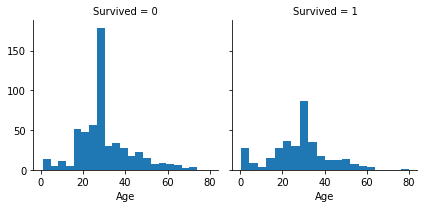

In [21]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

In [22]:
train = train.drop(['Name','Ticket', 'Cabin','Embarked'], axis=1)
test = test.drop(['Name','Ticket', 'Cabin','Embarked'], axis=1)

### Treinando Modelo

In [37]:
X_features = pd.get_dummies(train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']])

In [38]:
y = train['Survived']

In [45]:
kmeans = KMeans(n_clusters=2) # Queremos 2 clusters (sobreviventes e nao sobreviventes)
kmeans.fit(X_features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [60]:
from sklearn.metrics import classification_report

In [58]:
df_pred = pd.DataFrame()
df_pred['real'] = y
df_pred['pred'] = kmeans.predict(X_features)

In [61]:
print(classification_report(df_pred['real'], df_pred['pred']))

              precision    recall  f1-score   support

           0       0.64      0.97      0.77       549
           1       0.74      0.11      0.20       342

    accuracy                           0.64       891
   macro avg       0.69      0.54      0.48       891
weighted avg       0.68      0.64      0.55       891



Isso é bom para um baseline. O modelo conseguiu se agrupar corretamente com 55% (precisão do seu modelo). Mas, para melhorar o desempenho do modelo, você poderia ajustar alguns parâmetros do próprio modelo. Vou listar alguns desses parâmetros que a implementação scikit-learn do K-Means fornece:

- algorithm
- max_iter
- n_jobs (performance)

In [65]:
kmeans = kmeans = KMeans(n_clusters=2, max_iter=600, algorithm = 'auto')
kmeans.fit(X_features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [70]:
df_pred = pd.DataFrame()
df_pred['real'] = y
df_pred['pred'] = kmeans.predict(X_features)

In [67]:
print(classification_report(df_pred['real'], df_pred['pred']))

              precision    recall  f1-score   support

           0       0.26      0.03      0.05       549
           1       0.36      0.89      0.51       342

    accuracy                           0.36       891
   macro avg       0.31      0.46      0.28       891
weighted avg       0.30      0.36      0.23       891



Você pode ver uma diminuição na pontuação. Uma das razões é que você não escalou os valores dos diferentes recursos que você está alimentando para o modelo. Os recursos no conjunto de dados contêm diferentes intervalos de valores. Então, o que acontece é que uma pequena alteração em um recurso não afeta o outro recurso. Portanto, também é importante dimensionar os valores dos recursos para um mesmo intervalo.

Vamos fazer isso agora e, para esse experimento, você tomará de 0 a 1 como o intervalo de valores uniformes em todos os recursos.

In [68]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_features)

In [69]:
kmeans.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [72]:
df_pred = pd.DataFrame()
df_pred['real'] = y
df_pred['pred'] = kmeans.predict(X_scaled)

In [73]:
print(classification_report(df_pred['real'], df_pred['pred']))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       549
           1       0.74      0.68      0.71       342

    accuracy                           0.79       891
   macro avg       0.78      0.77      0.77       891
weighted avg       0.78      0.79      0.78       891



Ótimo! Você pode ver um aumento instantâneo no score.

Até agora você conseguiu carregar seus dados, pré-processá-los adequadamente, fazer um pouco de engenharia de recursos e, finalmente, foi possível criar um modelo K-Means e vê-lo em ação.

##### Agora, vamos discutir as limitações do K-Means

A maior desvantagem é que o K-Means exige que você pré-especifique o número de clusters (k). No entanto, para o conjunto de dados do Titanic, você tinha algum conhecimento de domínio disponível que informava o número de pessoas que sobreviveram no naufrágio. Isso pode nem sempre ser o caso com conjuntos de dados do mundo real.

Uma desvantagem adicional de k-means é que ele é sensível a outliers e resultados diferentes podem ocorrer se você alterar a ordem dos dados.